# ANN Training Strategies

## Parameters vs. Hyperparameters in ANN

- In traditional ML a large part of the process involves **feature engineering**:
    - this step is essential for some models to work at all
    - hyperparameter optimisation is useful to a degree
- In deep learning the feature engineering is mostly **done by the network** 
    - **hyperparameter optimisation** is crucial!!!
    
- **Parameters** in an ANN: these are the weights/biases that the ANN **learns** (via backpropagation) (their *number* depends on some hyperparameters)
- **Hyperparameters**: "design decisions" about your model that are set by you


## What Hyperparameters can we set/alter in our ANN?

### 1. The "architecture" of the network:

- **Number of layers**
   - The more layers, the more 'hidden features' your model will learn
   - Too many layers --> might overfit. 
   - Also see: [Vanishing Gradient Problem](https://towardsdatascience.com/the-vanishing-gradient-problem-69bf08b15484)
- **Number of neurons per layer**
   - More neurons, the more the model can learn.
    - Too many, overfitting
- **Types of layers**
    - Fully connected (Dense)
    - Convolutional
        - Image recognition
    - Recurrent layers
        - NLP (all kinds of speech/text processing)
        - Time series
- **Number of Epochs**
    - more epochs -> longer training, (potentially) better model
    - more epochs -> more likely to overfit
    
   - **Early stopping** - stop the model before it starts overfitting

You should keep increasing your model complexity as long as the score on your validation dataset improves. Observe performance of your validation dataset and stop as soon as performance decreases.

### 2. The Activation Function

![activation.jpeg](activation.jpeg)
[source](https://medium.com/@aborundiya/activation-function-for-multi-layer-neural-networks-a07ac473f69e)

The activation function is a function we apply to the sum of weights applied to previous inputs and the bias in order to have a meaningful way of deciding if the neuron "activates" giving the output.


#### What Activation Functions exist and how are they used?

![activation_functions.png](activation_functions.png)

- **Step Function** (NOT USED)
    - This is a simple "0 if negative / 1 if positive" decision boundary. It is undefined at zero and not differentiable, so only used as an introductory theoretical explanation of activation functions in teaching.


- **Linear** (output layer)
    - for regression problems.
    - The gradient of this is a constant value (does not depend on x) - it cannot be used in hidden layers as gradient descent fails. Only use for the **output of the final layer** in a linear regression problem

- **Sigmoid** (output layer)
    - Used for binary classification (logistic regression) as a single neuron. 
    - **Do not use in hidden layers** - tendency towards vanishing gradient. There are better options, eg.:


- **Hyperbolic Tan (tanh)** (hidden layers)
    - similar to sigmoid in shape but output (-1, 1)
    - works better than sigmoid in hidden layer because it centers the output around 0 (and not 0.5)
    - **don't use in the output layer**, use sigmoid over tanh
    - similar to sigmoid, could be slow to train because derivative is close to zero for large x
    
    
- **ReLU (Rectified Linear Unit)** (hidden layers)
    - **Avoids** vanishing gradient problem since the function doesn’t saturate in the positive region.
    - **Computationally efficient** and converges much faster than Sigmoid/Tanh.
    - **good first choice for hidden layers**
    - **Extensively used** as activation function in hidden layers of CNN architecture.
    - **undefined gradient around zero** and can cause a lot of dead neurons which never get activated


- **Leaky ReLU** (hidden layers)
    - similar to ReLU, but doesn't have 0 slope for negative values
 
 
- **ELU ((Exponential Linear Unit)** (hidden layers)
    - Softer than RELU, also differentiable at 0 and does not lead to "dead" neurons. 
    - This is one of the best activation functions to use but it is slower than RELU because of the non-linear component for negative values.


- **Softmax** (output layer)
    - equivalent to sigmoid but for **multiclass classification**
    - use in **the output layer**, with **as many neurons as classes**
    - probabilities add up to 1 

**Rule of thumb:** `sigmoid < tanh < ReLU < ELU`

### 3. Loss Function


This depends on the type of problem we have and is specified in the `model.compile()` step. 

Loss Functions:
- **Mean Squared Error (MSE)** (good for regression)
- **Log Loss** (good for binary classification, like in logistic regression)
- **Cross-Entropy** (good for multi-class classification)


### 4. Weight/Bias Initialization

- Best practice is to initialize weights with smaller numbers drawn from normal distribution. Initialize biases as zeros or small numbers. Some common initialization techniques:
     - **He** (tends to work well with ReLu-like activations)
     - **Xavier** (tends to work better with sigmoid and tanh)
     - **Glorot** (default)
- Documentaion: https://keras.io/api/layers/initializers/


### 5. Optimisers

This is also set in the `model.compile()` step.


**Gradient descent based:** 
- **Batch gradient descent**
    - Uses the whole dataset for a weights update
    - Slow, uses a lot of memory

- **Stochastic Gradient Descent**
    - Uses one datapoint at a time to calculate loss and update weights

- **Mini Batch gradient descent**
    - Uses a subset of the total dataset at a time to update weights
    - A good trade-off:
        - Uses medium amount of memory
        - Less noisy than stochastic GD
    - Pass `batch_size` in `model.fit()` to train on batches

**Adaptive optimization algorithms:**
- **Momentum** (interprets the gradient as acceleration (usually converges faster))
- **Nesterov** (calculates the gradient one step ahead in the direction of the momentum)
-  **AdaGrad** (automatically adjusts the learning rate; doesn't work well with ANNs though, since it brakes too soon),
- **RMSProp** (adaptive learning rate; decays exponentially based on 2 previous steps. Using a moving average of the recent gradients of that weight to avoid vanishing and exploding gradients)
- **Adam** (combination of RMSProp and Momentum Optimization. **Best of the above**)

Links for visualizing optimizers

https://emiliendupont.github.io/2018/01/24/optimization-visualization/

https://www.ikocabiyik.com/deep-learning/visualizing-ml-optimizers/

### 6. Regularisation

- **Batch Normalization**: 
    - adds 2 hyperparameters per layer that normalize the inputs to the activation function to a given average and scale. Will move the data to the optimal range of the subsequent activation function.
    - this gives you meaningful gradients, strongly reduces training time, and improves accuracy.
    - *gets rid of the vanishing gradient problem.*
    - *also does some regularization*
- **Dropout**:
    - randomly removes some percentage of the neurons at each epoch
    - This trains the model not to be rigid and learns to generalize more.

- See: https://keras.io/api/layers/regularizers/

## Some ideas to start with:

- Make sure that you have the correct shape for the input layer
- Make sure your final layers make sense (number of neurons and type) for your problem
- Use Relu (or Elu..etc) for the hidden layers
- Use the ADAM optimizer
- Use Dropout for regularization
- Use Batch normalization between layers
- Consider Early Stopping

## Practical Example to play around with:

In [1]:
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import numpy as np

from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam


import pandas as pd

Init Plugin
Init Graph Optimizer
Init Kernel


#### Define our inputs and targets

In [23]:
(xtrain, ytrain), (xtest, ytest) = keras.datasets.fashion_mnist.load_data()

In [24]:
# Always always check shapes! 
xtrain.shape, xtest.shape

((60000, 28, 28), (10000, 28, 28))

In [25]:
ytrain.shape, ytest.shape

((60000,), (10000,))

In [29]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### Take a look at the data

((60000, 28, 28), (28, 28))

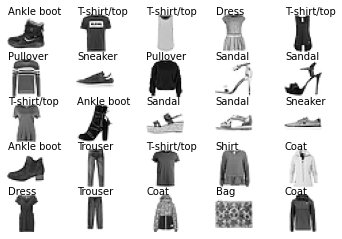

In [28]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap='Greys')
    plt.axis('off')
    numeric_class = ytrain[i]
    text_class = class_names[numeric_class]
    plt.text(0, 0, text_class) # displays y-values in each subplot

xtrain.shape, xtrain[1].shape

#### Reshape our data

As a dense layer expects all features to go to each neuron we need to first flatten this multi-dimensional object in a single but long dimension of which each element can go to a neuron.

In [6]:
xtrain[0].shape

(28, 28)

In [7]:
xtrain[0].flatten().shape

(784,)

In [8]:
# alternatives to flatten
# xtrain[0].reshape(-1).shape
# xtrain[0].reshape(28*28).shape

In [9]:
xtrain.shape # --> (60000,784)

(60000, 28, 28)

In [10]:
# flatten x into one dimension:
xtrain= xtrain.reshape(60000,-1)
xtrain.shape

(60000, 784)

In [11]:
ytrain[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [12]:
# ['five', 'zero', ....]

In [13]:
# one-hot-encode y
ytrain = to_categorical(ytrain)

In [14]:
ytrain.shape

(60000, 10)

In [15]:
ytrain[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

#### Now we can build a model

In [16]:
# Always clear the session!
K.clear_session()

model = keras.models.Sequential()

# input layer
model.add(layers.Dense(units=10, 
                             activation="relu", 
                             input_shape=(784,)
                            ))


# Batch Normalisation:
model.add(layers.BatchNormalization())

# hidden layer(s)
model.add(layers.Dense(units=20, 
             activation="relu"))



model.add(layers.Dropout(0.25))

# output layer
# units/neurons: number of classes
model.add(layers.Dense(units=10,
             activation="softmax")
)


Metal device set to: Apple M1


2022-05-10 06:53:55.550670: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-10 06:53:55.550783: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [17]:
model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 8,320
Trainable params: 8,300
Non-trainable params: 20
_________________________________________________________________


In [19]:
# Parameters for BatchNormalisation: [gamma weights, beta weights, moving_mean(non-trainable), moving_variance(non-trainable)]
# so output_shape of previous layer *4

In [20]:
# Early stopping:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', #the thing we are monitoring
    min_delta=0.0005, #the minimum change in the quantity that we want for the model to train for another epoch
    patience=3, #number of epochs with no improvement needed for the model to stop
    verbose=1, #0 is silent, 1 means a message is displayed when something happens
    #Exercise! More things to look up in the documentation:
    #restore_best_weights
    #baseline
)

In [21]:
hist = model.fit(xtrain, ytrain,
                 epochs=100, # 1 epoch is 1 iteration over entire X and y data
                 batch_size=600, # number of samples per gradient update
                 validation_split=0.2,
                 callbacks = [early_stop]
                )

Epoch 1/100


2022-05-10 06:53:55.688114: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-10 06:53:55.688284: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-10 06:53:55.818653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


80/80 [==============================] - 1s 9ms/step - loss: 1.7179 - accuracy: 0.4844 - val_loss: 1.0885 - val_accuracy: 0.7227
Epoch 2/100
 6/80 [=>............................] - ETA: 0s - loss: 1.3294 - accuracy: 0.6386

2022-05-10 06:53:56.539828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


80/80 [==============================] - 1s 9ms/step - loss: 1.0942 - accuracy: 0.6955 - val_loss: 0.7954 - val_accuracy: 0.7597
Epoch 3/100
80/80 [==============================] - 1s 8ms/step - loss: 0.8245 - accuracy: 0.7405 - val_loss: 0.6307 - val_accuracy: 0.8009
Epoch 4/100
80/80 [==============================] - 1s 8ms/step - loss: 0.7085 - accuracy: 0.7665 - val_loss: 0.5641 - val_accuracy: 0.8150
Epoch 5/100
80/80 [==============================] - 1s 8ms/step - loss: 0.6407 - accuracy: 0.7845 - val_loss: 0.5143 - val_accuracy: 0.8242
Epoch 6/100
80/80 [==============================] - 1s 8ms/step - loss: 0.5940 - accuracy: 0.8016 - val_loss: 0.4970 - val_accuracy: 0.8250
Epoch 7/100
80/80 [==============================] - 1s 8ms/step - loss: 0.5601 - accuracy: 0.8106 - val_loss: 0.4712 - val_accuracy: 0.8385
Epoch 8/100
80/80 [==============================] - 1s 8ms/step - loss: 0.5372 - accuracy: 0.8199 - val_loss: 0.4463 - val_accuracy: 0.8442
Epoch 9/100
80/80 [======

<AxesSubplot:>

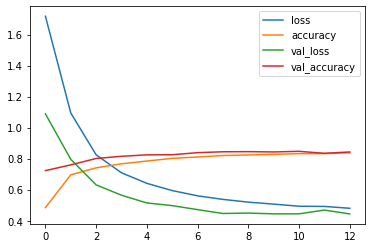

In [22]:
# Plot model accuracy and loss:
pd.DataFrame(hist.history).plot()

## Next steps:

Try the [exercises](https://spiced.space/costmary-function/ds-course/chapters/project_deep_learning/training_strategies/README.html) in the course notes

## See also:

- [Neural Network Zoo](https://www.asimovinstitute.org/neural-network-zoo/) 


- [Really excellent guide to choosing an activation function](https://mlfromscratch.com/activation-functions-explained/#/)
- [Understanding Activation Functions in Neural Networks](https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0)
- [Why `tanh` outperforms `sigmoid`](https://medium.com/analytics-vidhya/activation-functions-why-tanh-outperforms-logistic-sigmoid-3f26469ac0d1)
- [Guide to activation functions](https://himanshuxd.medium.com/activation-functions-sigmoid-relu-leaky-relu-and-softmax-basics-for-neural-networks-and-deep-8d9c70eed91e)
- [Sigmoid vs. Softmax](https://glassboxmedicine.com/2019/05/26/classification-sigmoid-vs-softmax/)
- [Another article on activation functions](https://medium.com/@aborundiya/activation-function-for-multi-layer-neural-networks-a07ac473f69e)
- [On the derivative of ReLU at 0 and why we go to leaky relu](https://sebastianraschka.com/faq/docs/relu-derivative.html)
- [Why do we need nonlinear activation function?](https://www.coursera.org/lecture/neural-networks-deep-learning/why-do-you-need-non-linear-activation-functions-OASKH)
- [How can RELU approximate any continuous function?](https://towardsdatascience.com/how-do-relu-neural-networks-approximate-any-continuous-function-f59ca3cf2c39)



- [A nice explainer of Loss Functions](https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/)
- [Loss functions cheat sheet](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html)


- [How to initialise weights in ANNs](https://www.analyticsvidhya.com/blog/2021/05/how-to-initialize-weights-in-neural-networks/)


- [Guide to Batch Normalisation](https://towardsdatascience.com/batch-norm-explained-visually-how-it-works-and-why-neural-networks-need-it-b18919692739)
- [3 levels of understanding for batch normalisation](https://towardsdatascience.com/batch-normalization-in-3-levels-of-understanding-14c2da90a338)


- [In-depth explanation of optimisers](https://mlfromscratch.com/optimizers-explained/#/)
- [Explanation of different Gradient Descent algorithms](https://www.analyticsvidhya.com/blog/2021/03/variants-of-gradient-descent-algorithm/)
- [A-Comparative-Study-of-Activation-Functions](https://wandb.ai/shweta/Activation%20Functions/reports/A-Comparative-Study-of-Activation-Functions--VmlldzoxMDQwOTQ)